In [779]:
%load_ext autoreload
%autoreload 2
from LHCB_Velo_Toy_Models.state_event_generator import *
from LHCB_Velo_Toy_Models import state_event_model 

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
dz = 20 #mm

n_particles=[20, 20, 20, 20]
events = len(n_particles)
layers = 3

n = np.sum(n_particles)

module_id = [l for l in range(1, layers+1)]
lx = [33 for x in range(1, layers+1)]
ly = [33 for x in range(1, layers+1)]
zs = [dz*l for l in range(1, layers+1)]

Detector = state_event_model.PlaneGeometry(module_id=module_id,lx = lx,ly = ly,z = zs)
# Detector = state_event_model.RectangularVoidGeometry(module_id=module_id,lx = lx,ly = ly,z=zs, void_x_boundary=5, void_y_boundary=5)

state_event_gen = StateEventGenerator(Detector, events = len(n_particles), n_particles=n_particles)#,
                                       #measurement_error=0.00, collision_noise=0.000)
state_event_gen.generate_random_primary_vertices(events, {'x': 0, 'y': 0, 'z': 0})

[(0, 0, 0.0), (0, 0, 0.0), (0, 0, 0.0), (0, 0, 0.0)]

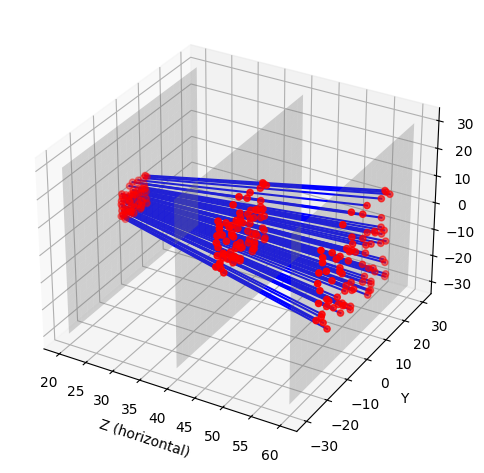

In [781]:
event_particles = []
for event in range(events):
    particles_list = []
    for particle in range(n):
        particle_dict = {
            'type' : 'MIP',
            'mass': 0.511,
            'q': 1
        }
        particles_list.append(particle_dict)
    event_particles.append(particles_list)

state_event_gen.generate_particles(event_particles)

event_tracks = state_event_gen.generate_complete_events()

event_tracks.plot_segments()

In [782]:
false_tracks = state_event_gen.make_noisy_event(drop_rate=0.0, ghost_rate=0.0)

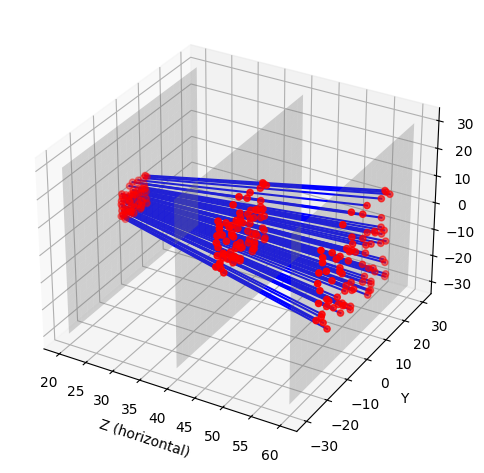

In [783]:
false_tracks.plot_segments()

In [784]:
print(len(false_tracks.modules[0].hits))
print(len(event_tracks.modules[0].hits))

80
80


In [785]:
from LHCB_Velo_Toy_Models.simple_hamiltonian import SimpleHamiltonian

ham = SimpleHamiltonian(epsilon=1e-7, gamma=2.0, delta=1.0)

ham.construct_hamiltonian(event=event_tracks, convolution=True)
classical_solution = ham.solve_classicaly()
T = .45
discretized_classical_solution = (classical_solution > T).astype(int)
 

In [786]:
from LHCB_Velo_Toy_Models.simple_hamiltonian import get_tracks

truth_event = false_tracks
rec_tracks = get_tracks(ham, discretized_classical_solution, false_tracks) 


In [787]:

from LHCB_Velo_Toy_Models.toy_validator import EventValidator as evl
validator = evl(truth_event, rec_tracks)
validator.print_metrics()

                  EVENT VALIDATION METRICS                  
Total Reconstructed Tracks:                              0
Total Truth Tracks:                                     80
Reconstruction Efficiency:                           0.00%
Ghost Rate:                                          0.00%
Clone Fraction:                           0.00% (0 clones)
Hit Efficiency:                                      0.00%
Purity:                                              0.00%
